![image.png](exam2023problem2.jpg)

In [1]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
import pandas as pd

# 加载数据
problem2_df = pd.read_csv('data/abalone.csv')

# 查看数据的前几行和列名，帮助选择特征和目标
print(problem2_df.head())
print(problem2_df.columns)


  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [6]:
# Part 1
# 定义特征和目标
# Fill in the features as a list of strings of the names of the columns
problem2_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]
# Fill in the target as a string with the correct column name
problem2_target = "Rings"

In [7]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42

from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

print(f"训练集大小: {problem2_X_train.shape}")
print(f"测试集大小: {problem2_X_test.shape}")

训练集大小: (3341, 7)
测试集大小: (836, 7)


In [8]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 初始化模型
problem2_model = LinearRegression()

# 训练模型
problem2_model.fit(problem2_X_train, problem2_y_train)

# 在测试集上预测
y_pred = problem2_model.predict(problem2_X_test)


In [9]:
# Part 4
# Evaluate the model by computing the mean absolute error
# MAE 衡量的是预测值和真实值之间的平均绝对差值，数值越小，模型性能越好。

from sklearn.metrics import mean_absolute_error

# 计算平均绝对误差
problem2_mae = mean_absolute_error(problem2_y_test, y_pred)
print(f"平均绝对误差 (MAE): {problem2_mae}")


平均绝对误差 (MAE): 1.6292482673936584


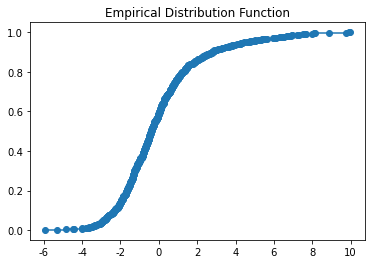

In [12]:
# Part 4
# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell
# from Utils import makeEDF,plotEDF

import numpy as np
from Utils import makeEDF, plotEDF
 
# 计算残差：真实值 - 预测值
residuals = problem2_y_test - y_pred

# 使用 Utils.py 文件中的 makeEDF 和 plotEDF 函数绘制经验分布函数，并添加 95% 置信区间。
# 创建经验分布函数 (EDF)
edf= makeEDF(residuals)
# 绘制 EDF 并添加 95% 置信区间
plotEDF(edf,force_display=True,points_at_jump=True, confidence_band=False, alpha=0.95)


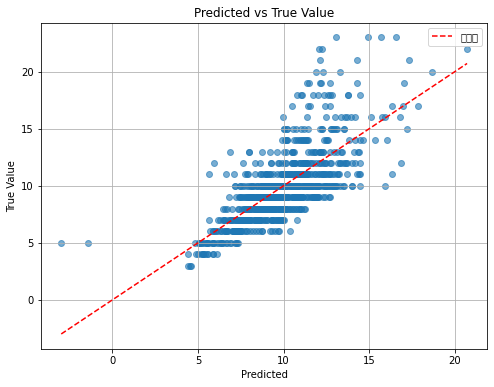

In [16]:
# Part 5
# Write the code below to produce the scatter plot for part 5

import matplotlib.pyplot as plt

# 绘制散点图
# 步骤：
#   X 轴表示模型的预测值，Y 轴表示测试集中的真实值。
#   散点图的理想情况是所有点接近一条 45° 的对角线，这表示预测值接近真实值。
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, problem2_y_test, alpha=0.6) # alpha=0.6，使散点有 60% 的不透明度（40% 的透明度）
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color="red", linestyle="--", label="理想线")
plt.xlabel("Predicted")
plt.ylabel("True Value")
plt.title("Predicted vs True Value")
plt.legend()
plt.grid()
plt.show()


6. Reason about the performance, for instance, is the value of the mean absolute error good/bad
and what do you think about the scatter plot in point 5? [3p]

In [ ]:
# 1.10 Part 6
# Double click this cell to enter edit mode and write your answer for part 6 below this line.
# Discussion on the value of the MAE
# Discussion on the predicted vs. true scatterplot
# Discussion

### Problem3

In [21]:
# Part 1
# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
import pandas as pd

# 加载数据
file_path = '/Users/yuezhou/4、UU/8、课程/Intro_to_DS/past_exams/1MS041/ExamPackage/2023/data/visits_clean.csv'

# 读取文件，假设没有标准分隔符，按行加载
with open(file_path, 'r') as file:
    lines = file.readlines()

# 第一行是字段名，其他行是数据
field_names = lines[0].strip().split()  # 提取字段名
data = [line.strip().split() for line in lines[1:]]  # 按空格分割数据

# 创建DataFrame
problem3_df = pd.DataFrame(data, columns=field_names)

# 检查数据类型并转换（将字符串转换为数值类型）
problem3_df = problem3_df.apply(pd.to_numeric, errors='ignore')

# 查看前几行数据
print(problem3_df.head())
print(problem3_df.columns)

# 特征：排除 ofp（目标变量）和与目标高度相关的变量如 ofnp、opp 等其他访问次数指标，避免数据泄露。
problem3_selected_features=['hosp', 'exclhlth', 'poorhlth',
       'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'male',
       'married', 'school', 'faminc', 'employed', 'privins', 'medicaid']
problem3_target=['ofp']

   ofp  ofnp  opp  opnp  emr  hosp  exclhlth  poorhlth  numchron  adldiff  \
0    5     0    0     0    0     1         0         0         2        0   
1    1     0    2     0    2     0         0         0         2        0   
2   13     0    0     0    3     3         0         1         4        1   
3   16     0    5     0    1     1         0         1         2        1   
4    3     0    0     0    0     0         0         0         2        1   

   ...  midwest  west  age  male  married  school  faminc  employed  privins  \
0  ...        0     0  6.9     1        1       6  2.8810         1        1   
1  ...        0     0  7.4     0        1      10  2.7478         0        1   
2  ...        0     0  6.6     0        0      10  0.6532         0        0   
3  ...        0     0  7.6     1        1       3  0.6588         0        1   
4  ...        0     0  7.9     0        1       6  0.6588         0        1   

   medicaid  
0         0  
1         0  
2         1  


In [22]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem3_features = problem3_selected_features
# Fill in the target as a string with the correct column name
problem3_target = problem3_target

In [23]:
from sklearn.model_selection import train_test_split

# Part 1
# 定义特征和目标
problem3_X = problem3_df[problem3_selected_features].values  # 特征转为 numpy 数组
problem3_y = problem3_df[problem3_target].values    # 目标转为 numpy 数组

# 划分训练集和测试集
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    problem3_X, problem3_y, test_size=0.2, random_state=42
)

# 打印数据集形状
print(f"训练集特征形状: {problem3_X_train.shape}, 目标形状: {problem3_y_train.shape}")
print(f"测试集特征形状: {problem3_X_test.shape}, 目标形状: {problem3_y_test.shape}")


训练集特征形状: (3524, 16), 目标形状: (3524, 1)
测试集特征形状: (882, 16), 目标形状: (882, 1)


![image.png](problem3-3.jpg)

In [26]:
# Part 3
# Fill in the function loss below
# 为了实现 Poisson 回归的损失函数，关键在于理解泊松分布的对数似然函数，并将其定义为优化目标（最小化负对数似然）
class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self, X, Y):
        import numpy as np
        from scipy import optimize

        # 定义损失函数
        def loss(coeffs):
            # 计算 lambda 参数
            lam = np.exp(np.dot(X, coeffs[:-1]) + coeffs[-1])
            # 定义损失函数
            loss_pr = np.sum(lam - Y * np.log(lam))
            
            return loss_pr
        
        # 使用优化方法最小化损失函数，求解系数
        initial_arguments = np.zeros(shape=X.shape[1] + 1)  # 初始值
        self.result = optimize.minimize(loss, initial_arguments, method='cg')
        self.coeffs = self.result.x
    
    def predict(self, X):
        # 使用训练好的模型进行预测
        if self.coeffs is not None:
            return np.exp(np.dot(X, self.coeffs[:-1]) + self.coeffs[-1])


In [25]:
# Part 4
# Initialize your PoissonRegression model
problem3_model = PoissonRegression()
# Fit your initialized model on the training data
problem3_model.fit(X=problem3_X_train, Y=problem3_y_train)
# This is to make sure that everything went well,
# check that success is True
print(problem3_model.result)

KeyboardInterrupt: 

In [ ]:
y_pred = problem3_model.predict(X=problem3_X_test)
print(mean_squared_error(y_pred, problem3_y_test))

In [ ]:
problem3_model.coeffs